# Task 2.4

Recap the process of sampling & quantization by hand. Take a pen & paper and
draw a sine wave that is made up of two cycles.  Now you are supposed to draw
the sample points for sampling rates of 4Hz & 10Hz as well as quantization
points for sample sizes of 1bit, 2bit, and 3bit. How do the resulting sampled
sine waves look like?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (8, 6)

def signal(t):
    return np.sin(t * 4 * np.pi)

def sample_quantize_plot(signal, start, end, samplerate, depth):
    samplepoints = np.arange(start, end, step=1/samplerate)
    # manually append because 'arange' excludes the end of the interval
    samplepoints = np.append(samplepoints, end)
    samples = [signal(t) for t in samplepoints]
    
    quantization_levels = np.linspace(-1, 1, 2**depth)
    quantization_limits = np.mean([quantization_levels[:-1], quantization_levels[1:]], axis=0)
    quantized_samples = np.array([quantization_levels[level] for level in np.digitize(samples, quantization_limits)])
 
    plt.title(f'Sampled Signal at {samplerate} Hz and {depth} bits/sample')
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
    plt.hlines(quantization_levels, 0, 1, color="lightblue")

    plt.plot(np.linspace(start, end), signal(np.linspace(start, end)), color='lightgray', label='signal')
    plt.plot(samplepoints, samples, 'o', color='red', label='time-discrete samples')
    plt.step(samplepoints, quantized_samples, where='post', color='red', label='quantized samples')
    
    plt.legend(loc='lower left')

start, end = 0, 1

samplepoints_4hz = np.arange(start, end, step=1/4)
samplepoints_10hz = np.arange(start, end, step=1/10)

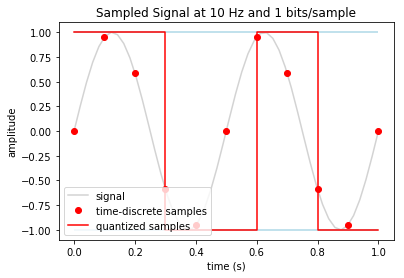

In [2]:
sample_quantize_plot(signal, start=0, end=1, samplerate=10
                     , depth=1)